In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas.plotting import parallel_coordinates

#https://www.google.com/covid19/mobility/
url='https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]

# n@u-@d-@i-@st@-t@e-e-@n@.org
# t@h@-e@n-a-@t-@u-@r@i-s@t.net
# k@i@-n@d-@n-@ud@@--@i@s-@t.com

file = pd.read_csv(url2)
data = DataFrame(file)

In [2]:
data.rename(columns={
 'retail_and_recreation_percent_change_from_baseline': "Retail and Recreation",
 'grocery_and_pharmacy_percent_change_from_baseline': "Grocery and Pharmacy",
 'parks_percent_change_from_baseline': "Parks",
 'transit_stations_percent_change_from_baseline': "Transit Stations",
 'workplaces_percent_change_from_baseline': "Workplaces",
 'residential_percent_change_from_baseline': "Residential"}, inplace=True)

In [3]:
for i in range(9, 15):
        print(data.columns[i])
        print('\t Count = %.2f' % data.iloc[:, i].count())
        print('\t Mean = %.2f' % data.iloc[:, i].mean())
        print('\t Standard deviation = %.2f' % data.iloc[:, i].std())
        print('\t Minimum = %.2f' % data.iloc[:, i].min())
        print('\t Maximum = %.2f' % data.iloc[:, i].max())

Retail and Recreation
	 Count = 101865.00
	 Mean = -26.76
	 Standard deviation = 30.13
	 Minimum = -100.00
	 Maximum = 333.00
Grocery and Pharmacy
	 Count = 106104.00
	 Mean = 2.70
	 Standard deviation = 32.58
	 Minimum = -100.00
	 Maximum = 321.00
Parks
	 Count = 95186.00
	 Mean = 5.78
	 Standard deviation = 53.05
	 Minimum = -100.00
	 Maximum = 694.00
Transit Stations
	 Count = 87723.00
	 Mean = -25.23
	 Standard deviation = 35.33
	 Minimum = -100.00
	 Maximum = 318.00
Workplaces
	 Count = 158870.00
	 Mean = -19.00
	 Standard deviation = 21.56
	 Minimum = -94.00
	 Maximum = 136.00
Residential
	 Count = 98651.00
	 Mean = 6.99
	 Standard deviation = 8.72
	 Minimum = -28.00
	 Maximum = 50.00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(8,2, figsize=(15,30))
index = 0

for i in range(9,14):
    for j in range(i+1,15):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], marker=".", s=5**1, color = 'red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1
cols = data[['Retail and Recreation',
 'Grocery and Pharmacy',
 'Parks',
 'Transit Stations',
 'Workplaces',
 'Residential']]
cols.corr()

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#Retail and Recreation - Grocery and Pharmacy --> Low positive correlation
#Retail and Recreation - Parks --> Low positive correlation
#Retail and Recreation - Transit Stations --> Low positive correlation
#Retail and Recreation - Workplaces --> Low positive correlation
#Retail and Recreation - Residential --> High negative correlation
#Grocery and Pharmacy - Parks --> Low positive correlation
#Grocery and Pharmacy -Transit Stations --> Low positive correlation
#Grocery and Pharmacy - Workplaces --> Low positive correlation
#Grocery and Pharmacy - Residential --> Low negative correlation
#Parks - Transit Stations --> Low positive correlation
#Parks - Workplaces --> Low positive correlation
#Parks - Residential --> Low negative correlation
#Transit Stations - Workplaces --> Low positive correlation
#Transit Stations - Residential --> Low negative correlation
#Workplaces - Residential --> High negative correlation

<AxesSubplot:>

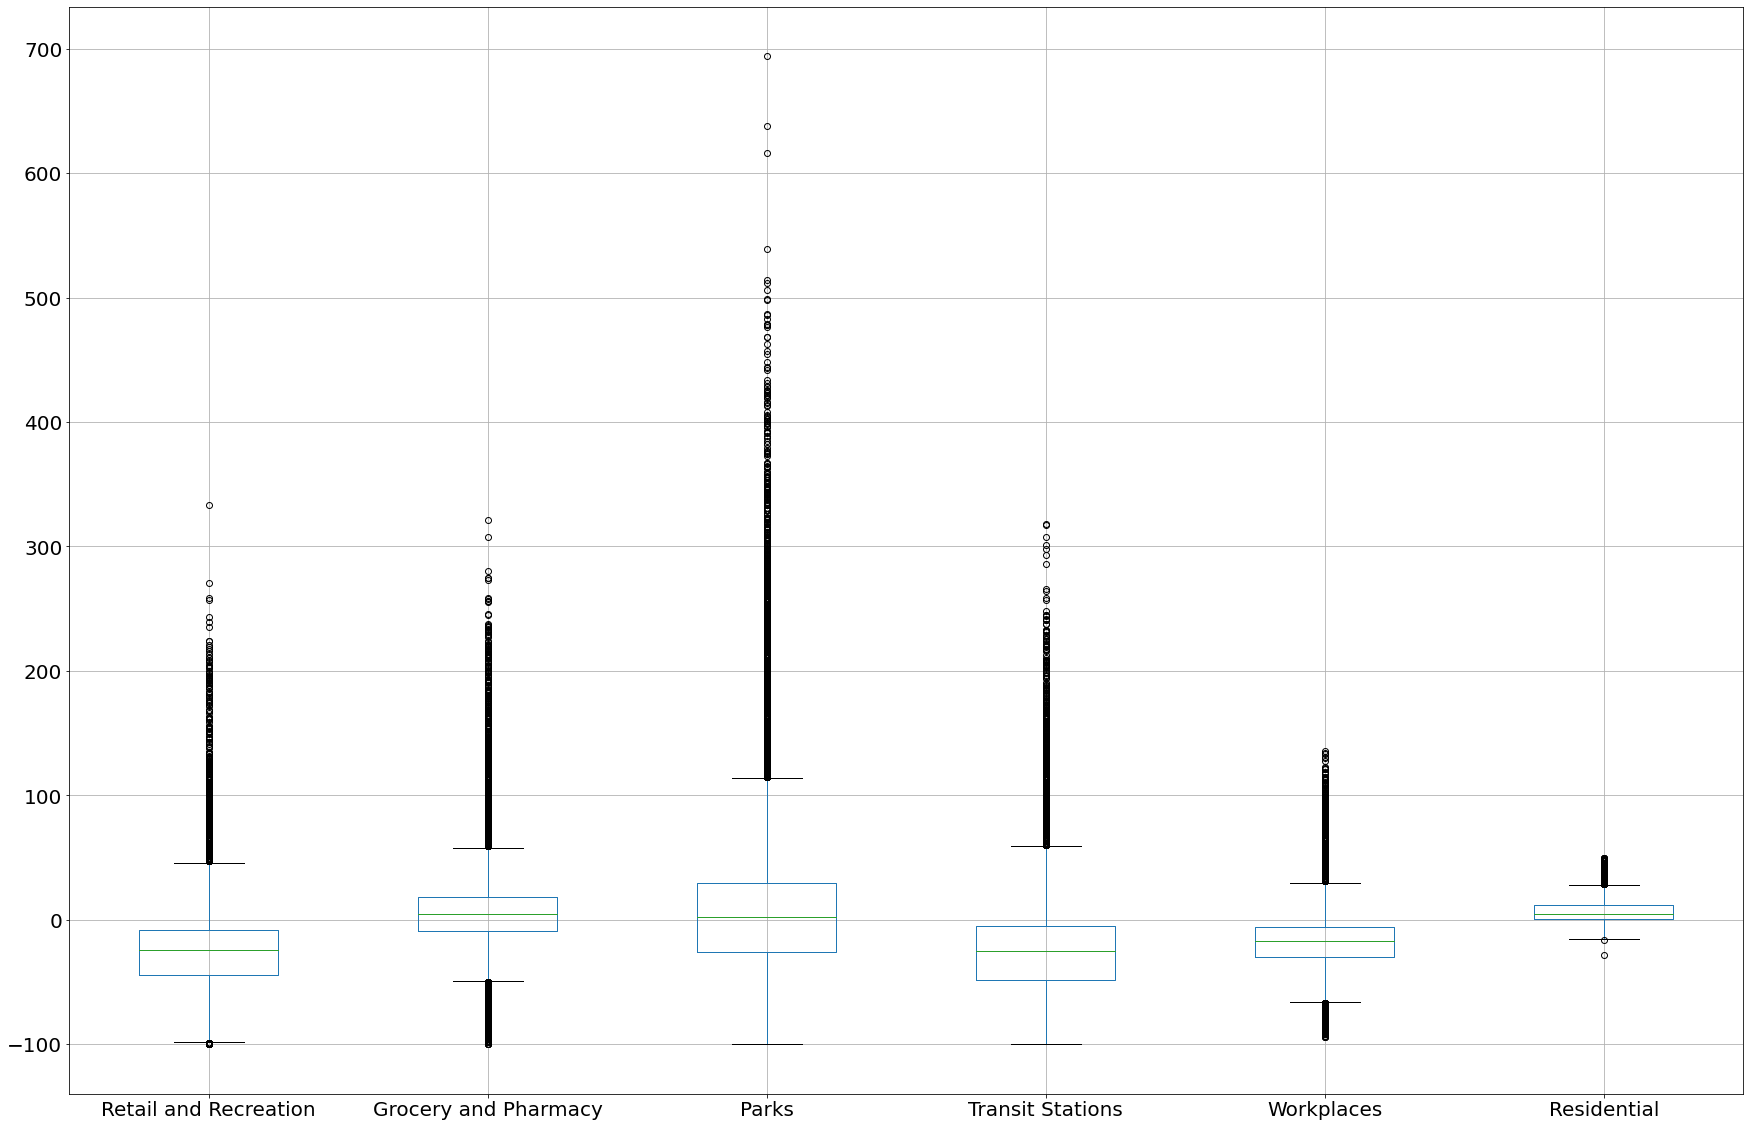

In [ ]:
data.boxplot(column=['Retail and Recreation',
 'Grocery and Pharmacy',
 'Parks',
 'Transit Stations',
 'Workplaces',
 'Residential'], figsize=(30,20), fontsize=20)

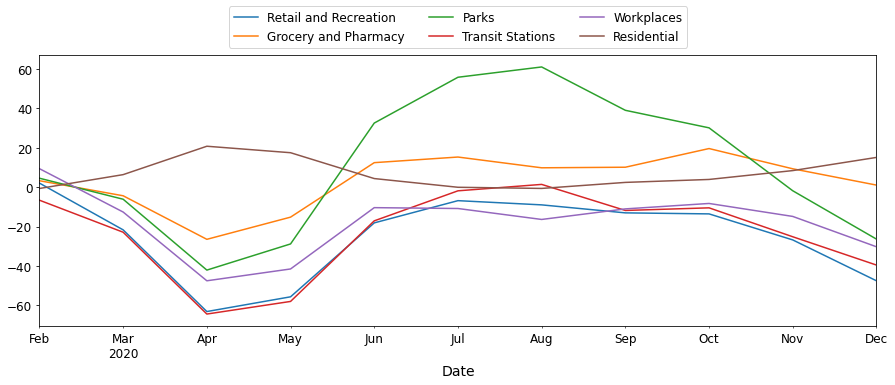

In [ ]:
data.index = pd.to_datetime(data['date'])

for i in range(9,15):
    monthly = data.iloc[:, i].groupby(pd.Grouper(freq='M')).mean()
    ax = monthly.plot(figsize=(15,5), fontsize = 12)
    plt.xlabel("Date", fontsize= 14)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),ncol=3, fontsize= 12)

In [ ]:
url3='https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url4='https://drive.google.com/uc?id=' + url.split('/')[-2]

data_1 = pd.read_csv(url4, header='infer')

data_1.rename(columns={
 'retail_and_recreation_percent_change_from_baseline': "Retail and Recreation",
 'grocery_and_pharmacy_percent_change_from_baseline': "Grocery and Pharmacy",
 'parks_percent_change_from_baseline': "Parks",
 'transit_stations_percent_change_from_baseline': "Transit Stations",
 'workplaces_percent_change_from_baseline': "Workplaces",
 'residential_percent_change_from_baseline': "Residential"}, inplace=True)

data_1.index = pd.to_datetime(data_1['date'])

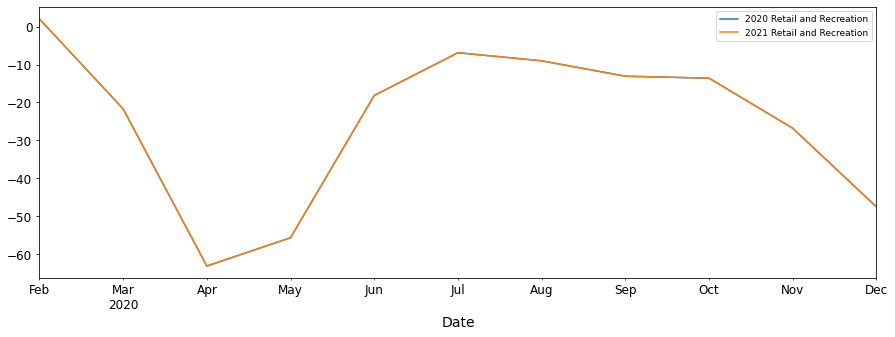

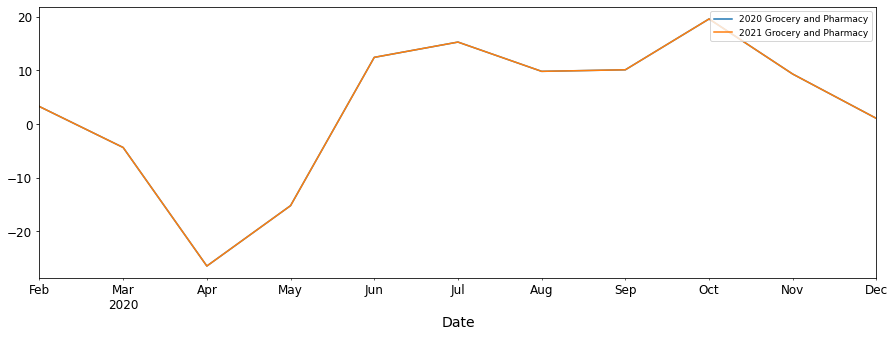

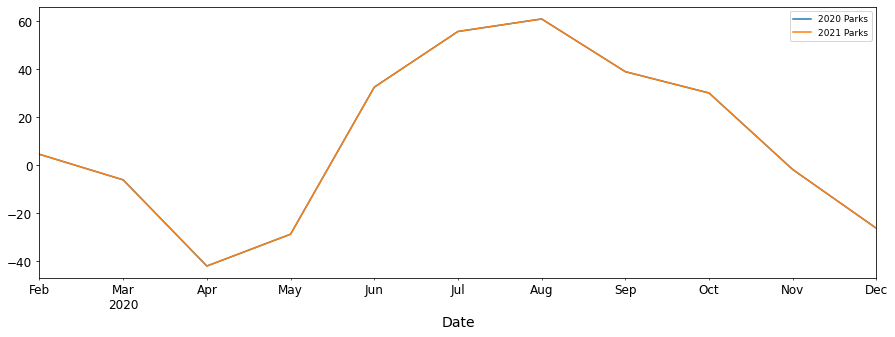

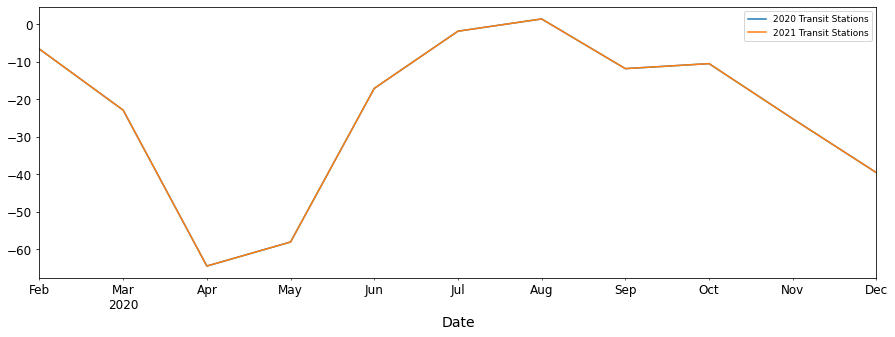

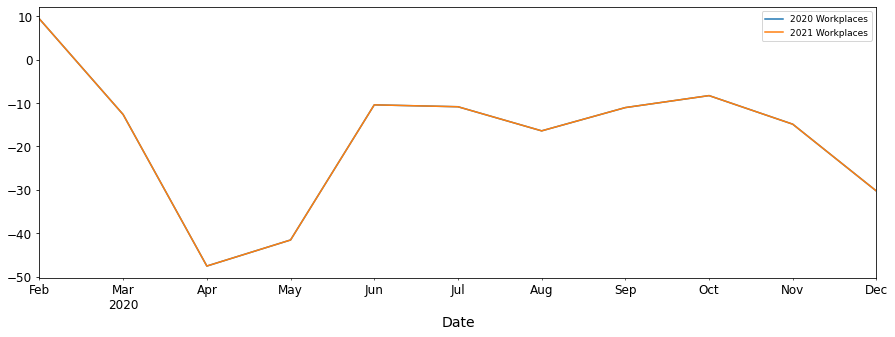

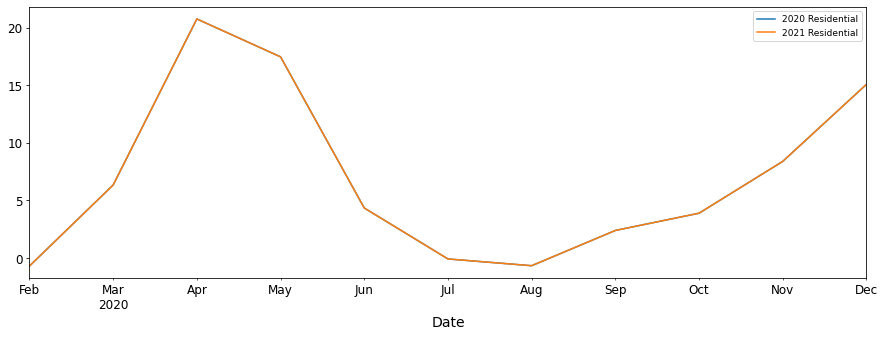

In [ ]:
for i in range(9,15):
    
    monthly = data.iloc[:, i].groupby(pd.Grouper(freq='M')).mean()
    monthly_1 = data_1.iloc[:, i].groupby(pd.Grouper(freq='M')).mean()
    
    monthly.plot(figsize=(12,3), label="2020 "+data.columns[i], fontsize = 12)
    monthly_1.plot(figsize=(15,5), label="2021 "+data_1.columns[i], fontsize = 12)
    
    
    
    plt.xlabel("Date", fontsize= 14)
    plt.legend(loc='upper right', fontsize= 9)
    plt.show()

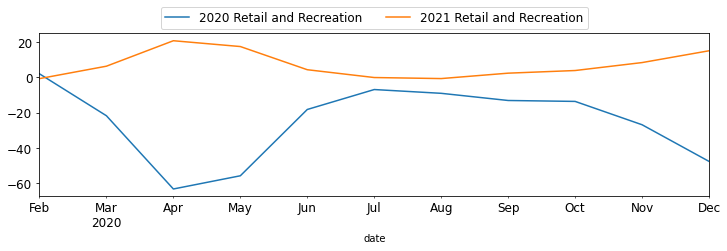

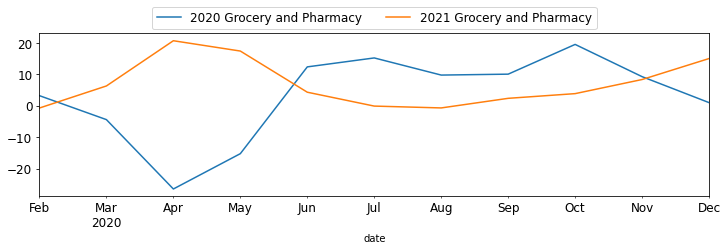

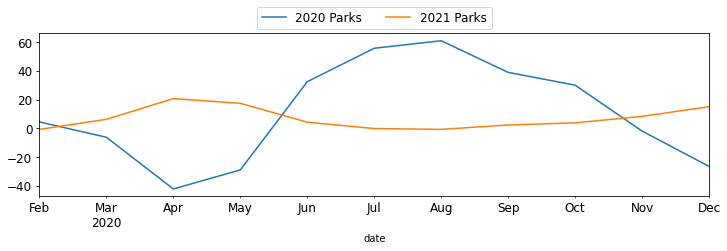

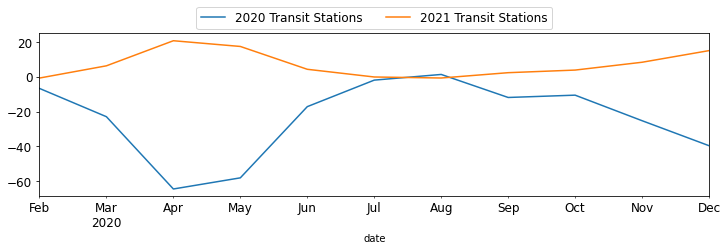

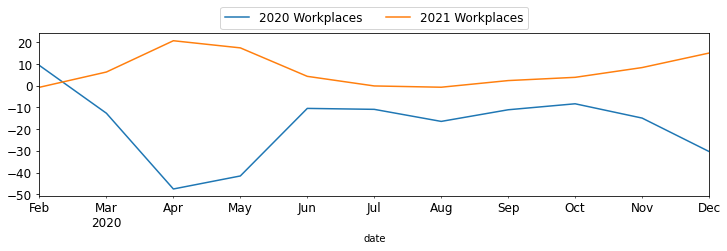

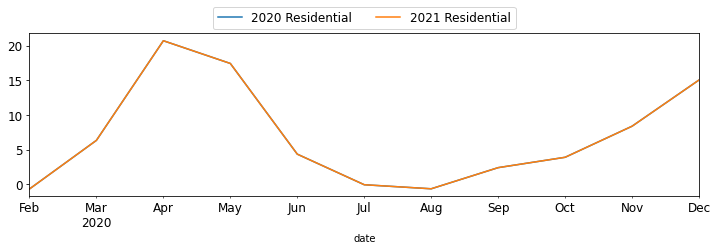

In [ ]:
for i in range(9,15):
    
    ax = data.iloc[:, i].groupby(pd.Grouper(freq='M')).mean()
    monthly_1 = data_1.iloc[:, i].groupby(pd.Grouper(freq='M')).mean()
    
    ax.plot(figsize=(12,3), label="2020 "+data.columns[i], fontsize = 12)
    ax1.plot(label="2021 "+data.columns[i])
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),ncol=3, fontsize= 12)
    plt.show()
    
    